In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import exists
import datetime
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import statsmodels.api as sm
if not os.getcwd().endswith('data'):
    os.chdir('F:\\bigevents\\')

In [33]:
from os import listdir
from os.path import isfile, join
mypath = 'F:\\bigevents\\'

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
len(onlyfiles)

10

In [34]:
onlyfiles

['EAS06-12-2021.txt',
 'EAS09-03-2022.txt',
 'EAS11-08-2021.txt',
 'EAS15-08-2021.txt',
 'EAS20-11-2021.txt',
 'EAS21-03-2022.txt',
 'EAS25-05-2021.txt',
 'EAS07-12-2021.txt',
 'EAS11-12-2021.txt',
 'EAS18-10-2021.txt']

In [35]:
osc1 = pd.DataFrame()
sizw = 0
names = [name for i in range(0, 16) for name in ['t' + str(i),'A' + str(i)]]
for file in onlyfiles:    
    osc = pd.read_csv(file, delim_whitespace=True, names=names)
    sizw+=osc.shape[0]
    osc1 = osc1.append(osc)
osc1.shape, osc.shape,sizw

((1542010, 32), (305873, 32), 1542010)

In [37]:
osc2 = osc1
osc2 = osc2[~np.isnan(osc2.A0)]
osc2.shape, osc1.shape

((1537287, 32), (1542010, 32))

In [38]:
osc2[:3]

,t0,A0,t1,A1,t2,A2,t3,A3,t4,A4,...,t11,A11,t12,A12,t13,A13,t14,A14,t15,A15
0,4,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,20.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
nneut = np.array(osc2.A0)
nan = np.array(osc2.A1)
nn = []
ind = []
#nn.append(nneut[0])

for i in range(osc2.shape[0]):
    if(nan[i] !=nan[i]):
        ind.append(i)
        nn.append(nneut[i])
ind.append(i)
nn = np.array(nn)
ind = np.array(ind)
ind.shape, osc2.shape, nn.shape

((4729,), (1537287, 32), (4728,))

In [40]:
ind, nn

(array([      0,     301,     602, ..., 1536885, 1537086, 1537286]),
 array([4., 3., 5., ..., 5., 5., 5.]))

In [41]:
k=0
new_ind = []
for i in range(osc2.shape[0]):
    if(i==ind[k+1] and nn[k]>=10):
        new_ind.append(ind[k])
        new_ind.append(ind[k+1])
        k+=1
    elif(i==ind[k+1] and nn[k]<10):
        k+=1
new_ind = np.array(new_ind)
new_ind.shape

(152,)

In [42]:
new_ind

array([  13271,   13672,   22909,   23310,   24012,   24513,   46300,
         46801,   48406,   48707,   48908,   49709,   50512,   50813,
         52922,   53223,   55731,   56132,   58038,   58939,   60043,
         60344,   70084,   70585,   94088,   94489,  113064,  113865,
        129728,  130029,  131535,  131936,  145593,  145894,  151414,
        151715,  156935,  157236,  158642,  159043,  170415,  171616,
        186575,  186976,  201432,  201833,  204142,  204443,  220206,
        220607,  223217,  223518,  227935,  228236,  232251,  232652,
        251326,  251727,  255140,  255441,  261766,  262067,  264176,
        264477,  279940,  280241,  287638,  288039,  295366,  295667,
        327590,  328591,  337427,  337728,  342146,  342547,  343651,
        344052,  347765,  348066,  351379,  351780,  376975,  377376,
        378079,  378380,  389824,  390125,  392835,  393136,  399561,
        399962,  416825,  417226,  420036,  420537,  424050,  424451,
        426057,  426

In [54]:
osc3 = pd.DataFrame()
k=0
while(k<new_ind.shape[0]-1):
    osc3 = osc3.append(osc2[new_ind[k]:new_ind[k+1]])
    k+=2
osc3.shape        

(35476, 32)

In [55]:
df = osc3[~np.isnan(osc3.A1)]
df.shape, df[:3]

((35400, 32),
       t0   A0   t1   A1   t2   A2   t3   A3    t4   A4  ...  t11  A11  t12  \
 1413   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  40.0 -2.0  ...  0.0  0.0  0.0   
 1414   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  60.0 -1.0  ...  0.0  0.0  0.0   
 1415   0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  80.0  0.0  ...  0.0  0.0  0.0   
 
       A12   t13  A13    t14  A14     t15  A15  
 1413  0.0 -60.0  0.0  940.0 -1.0   960.0 -1.0  
 1414  0.0 -40.0  0.0  960.0 -1.0   980.0 -1.0  
 1415  0.0 -20.0  0.0  980.0 -2.0  1000.0  0.0  
 
 [3 rows x 32 columns])

In [410]:
df[35390:35400]

,t0,A0,t1,A1,t2,A2,t3,A3,t4,A4,...,t11,A11,t12,A12,t13,A13,t14,A14,t15,A15
198991,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14913140.0,3.0,0.0,0.0,6919400.0,17.0,0.0,0.0,0.0,0.0
198992,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14913160.0,2.0,0.0,0.0,6919420.0,16.0,0.0,0.0,0.0,0.0
198993,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14913180.0,2.0,0.0,0.0,6919440.0,17.0,0.0,0.0,0.0,0.0
198994,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14913200.0,2.0,0.0,0.0,6919460.0,16.0,0.0,0.0,0.0,0.0
198995,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14913220.0,2.0,0.0,0.0,6919480.0,18.0,0.0,0.0,0.0,0.0
198996,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14913240.0,2.0,0.0,0.0,6919500.0,15.0,0.0,0.0,0.0,0.0
198997,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14913260.0,2.0,0.0,0.0,6919520.0,17.0,0.0,0.0,0.0,0.0
198998,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14913280.0,2.0,0.0,0.0,6919540.0,15.0,0.0,0.0,0.0,0.0
198999,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14913300.0,3.0,0.0,0.0,6919560.0,17.0,0.0,0.0,0.0,0.0
199000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14913320.0,2.0,0.0,0.0,6919580.0,15.0,0.0,0.0,0.0,0.0


In [45]:
nneut = np.array(osc1.A0)
nan = np.array(osc1.A1)
nn = []
ind = []
metka = np.array(osc1.t0)
nn.append(nneut[0])
ind.append(0)
for i in range(1,osc1.shape[0]):
    if(metka[i-1]==-11111111):
        nn.append(nneut[i])
        ind.append(i)
nn = np.array(nn)
ind = np.array(ind)
nneut.shape, osc1.shape, nn.shape, ind.shape

((1542010,), (1542010, 32), (4723,), (4723,))

In [46]:
nn, ind

(array([4., 3., 5., ..., 5., 5., 5.]),
 array([      0,     302,     604, ..., 1541404, 1541606, 1541808]))

In [47]:
nn_new = nn[nn>=10]
nn_new.shape

(76,)

In [48]:
np.sum(nn_new)

928.0

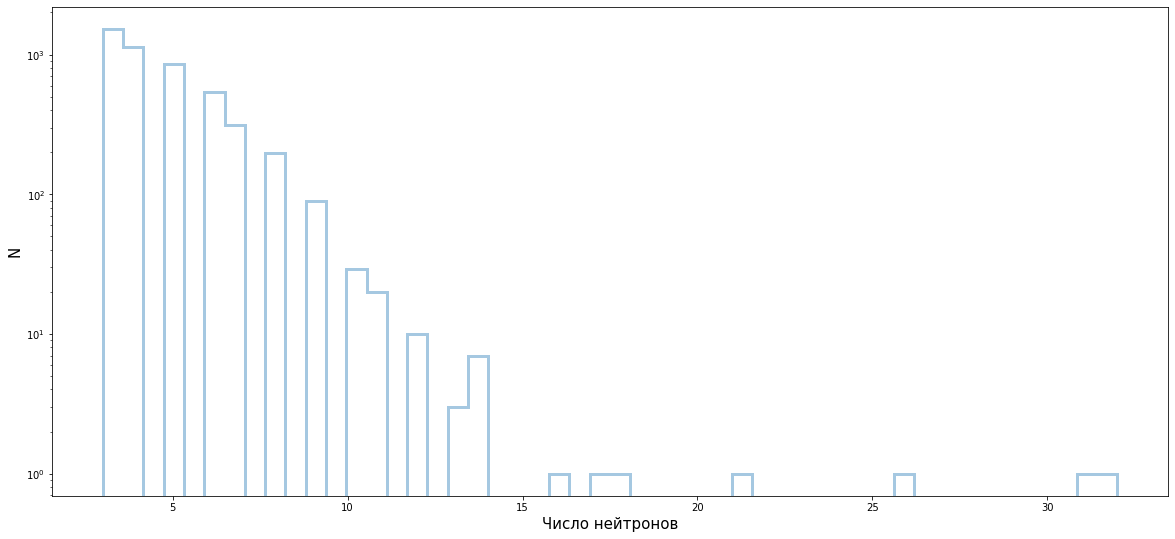

In [49]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20, 9))
bin_count = 60

sns.distplot(nn, kde=False, hist_kws={"histtype": "step","linewidth": 3})

plt.xlabel("Число нейтронов",fontsize = 15)
plt.ylabel("N",fontsize = 15)
#plt.xlim(0, 150)
plt.yscale('log')
plt.show()

In [50]:
df = osc[~np.isnan(osc.A1)]
df.shape

(303397, 32)

In [56]:
df.shape

(35400, 32)

In [52]:
df[:3]

,t0,A0,t1,A1,t2,A2,t3,A3,t4,A4,...,t11,A11,t12,A12,t13,A13,t14,A14,t15,A15
1,60,-1.0,140.0,0.0,0.0,0.0,100.0,0.0,240.0,-2.0,...,240.0,-3.0,-60.0,-2.0,-20.0,1.0,20.0,-1.0,80.0,2.0
2,80,0.0,160.0,-1.0,0.0,0.0,120.0,0.0,260.0,-2.0,...,260.0,-3.0,-40.0,-1.0,0.0,-2.0,40.0,0.0,100.0,-1.0
3,100,-1.0,180.0,-1.0,0.0,0.0,140.0,0.0,280.0,-3.0,...,280.0,-3.0,-20.0,0.0,20.0,-2.0,60.0,-1.0,120.0,-3.0


In [57]:
x = []
y = []
c = 0
for j in range(0,32,2):
    for i in range(df.shape[0]):
        if(int(df.iloc[i][j])==0 and int(df.iloc[i][j+1])==0):
            c+=1        
        else:
            x.append(int(df.iloc[i][j]))
            y.append(int(df.iloc[i][j+1]))
x = np.array(x)
y = np.array(y)

In [58]:
x.shape, y.shape

((176767,), (176767,))

In [414]:
x[0:99], y[0:99].shape

(array([17584160, 17584180, 17584200, 17584220, 17584240, 17584260,
        17584280, 17584300, 17584320, 17584340, 17584360, 17584380,
        17584400, 17584420, 17584440, 17584460, 17584480, 17584500,
        17584520, 17584540, 17584560, 17584580, 17584600, 17584620,
        17584640, 17584660, 17584680, 17584700, 17584720, 17584740,
        17584760, 17584780, 17584800, 17584820, 17584840, 17584860,
        17584880, 17584900, 17584920, 17584940, 17584960, 17584980,
        17585000, 17585020, 17585040, 17585060, 17585080, 17585100,
        17585120, 17585140, 17585160, 17585180, 17585200, 17585220,
        17585240, 17585260, 17585280, 17585300, 17585320, 17585340,
        17585360, 17585380, 17585400, 17585420, 17585440, 17585460,
        17585480, 17585500, 17585520, 17585540, 17585560, 17585580,
        17585600, 17585620, 17585640, 17585660, 17585680, 17585700,
        17585720, 17585740, 17585760, 17585780, 17585800, 17585820,
        17585840, 17585860, 17585880, 17585900, 

In [59]:
neutron = []
charged = []
count_nn = []
count_chh = []

step = 0
count_n = 1
count_ch = 1
for i in range(1, x.shape[0]):
    if(np.abs(x[i]-x[i-1])==20 and x[i] > 2200):
        count_n+=1
    elif(np.abs(x[i]-x[i-1])==20 and x[i] <= 2200):
        count_ch+=1
    elif(np.abs(x[i]-x[i-1])!=20 and x[i-1] > 5_000):
        neutron.append(y[step:step+count_n])
        count_nn.append(count_n)
        step+=count_n
        count_n = 1
    elif(np.abs(x[i]-x[i-1])!=20 and x[i-1] <= 2200):
        charged.append(y[step:step+count_ch])
        count_chh.append(count_ch)
        step+=count_ch
        count_ch = 1

In [60]:
neutron = np.array(neutron)
charged = np.array(charged)
count_nn = np.array(count_nn)
count_chh = np.array(count_chh)

neutron.shape, charged.shape, count_nn.shape, count_chh.shape

((913,), (917,), (913,), (917,))

# Непосредственно создание

In [61]:
otob_n = []
otob_ch = []

for i in range(charged.shape[0]):
    if(charged[i].shape[0]==100):
        otob_ch.append(charged[i])
        
for i in range(neutron.shape[0]):
    if(neutron[i].shape[0]==100):
        otob_n.append(neutron[i])
        
otob_ch = np.array(otob_ch)
otob_n = np.array(otob_n)
otob_ch.shape, otob_n.shape

((679, 100), (890, 100))

In [62]:
x.shape

(176767,)

In [63]:
x1 = np.arange(63)
x = np.arange(100)
yn_ot = []
x1[0] = x[0]
j = 0
for m in range(otob_n.shape[0]):
    y_new = np.zeros(63)
    j=0
    for i in range(0, 100-1,1):
        if(x1[j]*32>x[i]*20 and x1[j]*32<x[i+1]*20):
            k = (otob_n[m][i]-otob_n[m][i+1])/((x[i]*20e-3-x[i+1]*20e-3))
            b = otob_n[m][i+1] - x[i+1]*k*20e-3
            y_new[j] = k*x1[j]*32e-3+b
            j+=1
        elif(x1[j]*32==x[i]*20):
            y_new[j] = otob_n[m][i]
            j+=1
    yn_ot.append(y_new)
yn_ot = np.array(yn_ot)

In [64]:
x1 = np.arange(63)
y_ot = []
x1[0] = x[0]
#j = 0
for m in range(otob_ch.shape[0]):
    y_new = np.zeros(63)
    j=0
    for i in range(0, 100-1,1):
        if(x1[j]*32>x[i]*20 and x1[j]*32<x[i+1]*20):
            k = (otob_ch[m][i]-otob_ch[m][i+1])/((x[i]*20e-3-x[i+1]*20e-3))
            b = otob_ch[m][i+1] - x[i+1]*k*20e-3
            y_new[j] = k*x1[j]*32e-3+b
            j+=1
        elif(x1[j]*32==x[i]*20):
            y_new[j] = otob_ch[m][i]
            j+=1
    y_ot.append(y_new)
y_ot = np.array(y_ot)

In [65]:
y_ot.shape, yn_ot.shape #x1[0:62]*32e-3, y_new[0:62]

((679, 63), (890, 63))

In [89]:
y_nsl = []
ind = 0
for i in range(yn_ot.shape[0]):
    j = np.argmax(yn_ot[i])
    while(yn_ot[i][j]>2 and j!=0):
        j-=1
    if(j+38<63 and np.argmax(yn_ot[i])-j!=30):
        y_nsl.append(yn_ot[i][j:j+38])
y_nsl = np.array(y_nsl)
y_nsl.shape

(833, 38)

In [88]:
y_sl = []
innd = []
ind = 0
for i in range(y_ot.shape[0]):
    j = np.argmax(y_ot[i])
    while(y_ot[i][j]>2 and j!=0):
        j-=1
    if(j+38<63 and np.argmax(yn_ot[i])-j!=30):
        y_sl.append(y_ot[i][j:j+38])
        innd.append(i)
y_sl = np.array(y_sl)
innd = np.array(innd)
y_sl.shape

(626, 38)

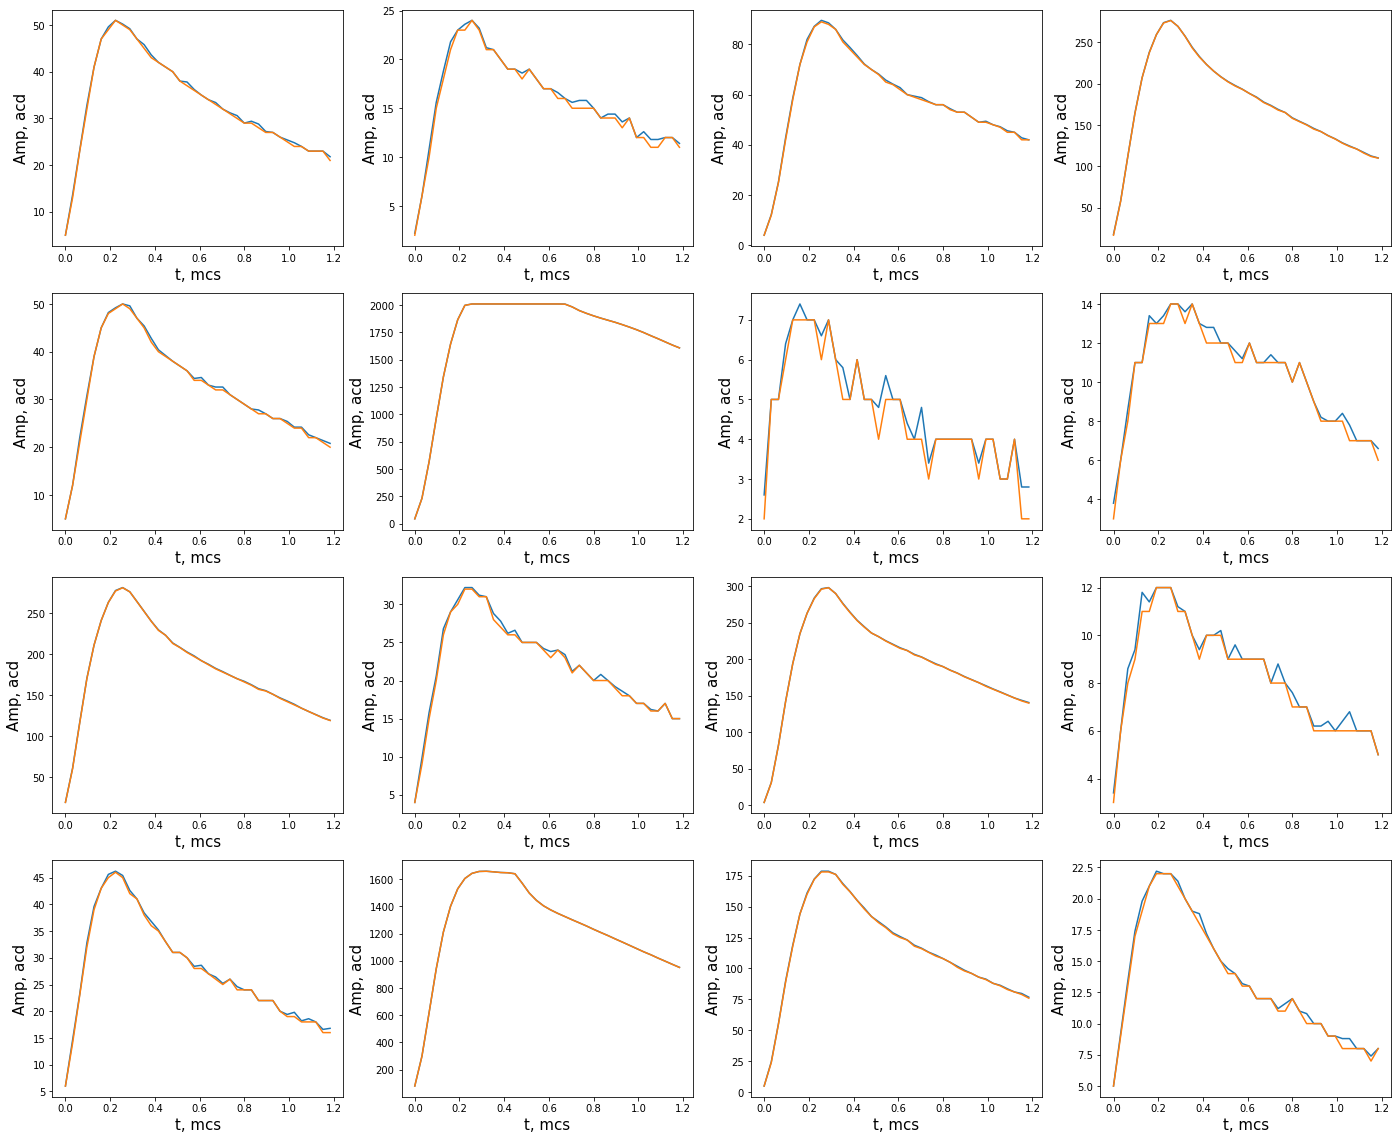

In [501]:
fig, axs = plt.subplots(4, 4, figsize=(24, 20))
axs = axs.ravel()
x = np.arange(38)
#bin_count = 60
for j in range(16):
    axs[j].plot(x*32e-3, y_sl[j])
    axs[j].plot(x*32e-3, y_sl[j].astype('int'))
    axs[j].set_xlabel("t, mcs", fontsize = 15)
    axs[j].set_ylabel("Amp, acd", fontsize = 15)

In [174]:
y_ch = np.copy(y_sl)
y_n = np.copy(y_nsl)
y_ch.shape, y_n.shape

((626, 38), (833, 38))

In [175]:
import statsmodels.api as sm
charged = np.zeros((y_ch.shape[0],38))
for i in range(y_ch.shape[0]):
    y_lowess = sm.nonparametric.lowess(y_ch[i], x, frac = 0.11)
    charged[i] = y_lowess[:,1]
charged.shape  

(626, 38)

In [176]:
neutron = np.zeros((y_n.shape[0],38))
for i in range(y_n.shape[0]):
    y_lowess = sm.nonparametric.lowess(y_n[i], x, frac = 0.11)
    neutron[i] = y_lowess[:,1]
neutron.shape  

(833, 38)

In [177]:
y_n = np.copy(neutron)
y_ch = np.copy(charged)

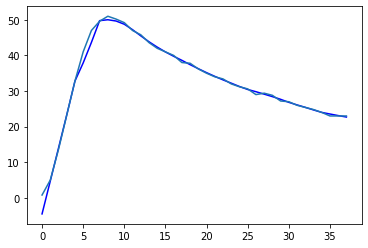

In [95]:
y_lowess = sm.nonparametric.lowess(y_ch[0], x, frac = 0.11)
plt.plot(y_lowess[:, 0], y_lowess[:, 1], 'b')  # some noise removed
plt.plot(x, y_ch[0])

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
from os.path import exists
import datetime
import os
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import torchvision
import torch
import torch.nn as nn
import glob
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torch.optim import Adam
from torch.autograd import Variable
from PIL import Image
from numpy import asarray
from tqdm.notebook import tqdm
import requests
from sklearn.metrics import classification_report
from matplotlib import gridspec
class CNN(torch.nn.Module):
    @property
    def device(self):
        for p in self.parameters():
            return p.device
        
    def __init__(self):
        super(CNN, self).__init__()
        
        #shape (1, 38)
        
        self.layers = torch.nn.Sequential()
        self.layers.add_module('conv1', torch.nn.Conv1d(1, 12, kernel_size = 3, stride=1, padding = 1)) # 1x38
        self.layers.add_module('relu1', torch.nn.ReLU())
        self.layers.add_module('dropout2', nn.Dropout(0.3))
        self.layers.add_module('maxpool1', torch.nn.MaxPool1d(2))
        self.layers.add_module('conv2', torch.nn.Conv1d(12, 20, kernel_size = 3, padding = 1)) # 12x19
        self.layers.add_module('relu2', torch.nn.ReLU())
        self.layers.add_module('dropout2', nn.Dropout(0.3))
        self.layers.add_module('maxpool2', torch.nn.MaxPool1d(2))        #20x9
        
        self.layers.add_module('flatten', torch.nn.Flatten())
        self.layers.add_module('linear1', torch.nn.Linear(20*9, 120))
        self.layers.add_module('relu3', torch.nn.ReLU())
        self.layers.add_module('dropout1', nn.Dropout(0.3))
        self.layers.add_module('linear2', torch.nn.Linear(120, 84))
        self.layers.add_module('relu4', torch.nn.ReLU())
        self.layers.add_module('dropout2', nn.Dropout(0.3))
        self.layers.add_module('linear3', torch.nn.Linear(84, 2))

    def forward(self, input):
        return self.layers(input)
model1 = torch.load('F:\\1.New\\nets\\cnn_1d_n')
model1.eval()

CNN(
  (layers): Sequential(
    (conv1): Conv1d(1, 12, kernel_size=(3,), stride=(1,), padding=(1,))
    (relu1): ReLU()
    (dropout2): Dropout(p=0.3, inplace=False)
    (maxpool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv1d(12, 20, kernel_size=(3,), stride=(1,), padding=(1,))
    (relu2): ReLU()
    (maxpool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (linear1): Linear(in_features=180, out_features=120, bias=True)
    (relu3): ReLU()
    (dropout1): Dropout(p=0.3, inplace=False)
    (linear2): Linear(in_features=120, out_features=84, bias=True)
    (relu4): ReLU()
    (linear3): Linear(in_features=84, out_features=2, bias=True)
  )
)

In [179]:
y_ch = y_ch[:, :, np.newaxis]
y_ch = np.expand_dims(y_ch, 1) 
y_ch = y_ch.reshape((y_ch.shape[0],1, 38))
y_ch = np.array(y_ch, dtype=float)

In [180]:
y_n = y_n[:, :, np.newaxis]
y_n = np.expand_dims(y_n, 1) 
y_n = y_n.reshape((y_n.shape[0],1, 38))
y_n = np.array(y_n, dtype=float)

In [181]:
y_ch.shape, y_n.shape

((626, 1, 38), (833, 1, 38))

In [182]:
X_ts_ch = torch.Tensor(y_ch)
X_ts_n = torch.Tensor(y_n)

In [183]:
pred_ch = torch.argmax(model1(X_ts_ch), dim=-1).cpu().numpy()
pred_n = torch.argmax(model1(X_ts_n), dim=-1).cpu().numpy()

In [184]:
pred_ch[0:16]

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

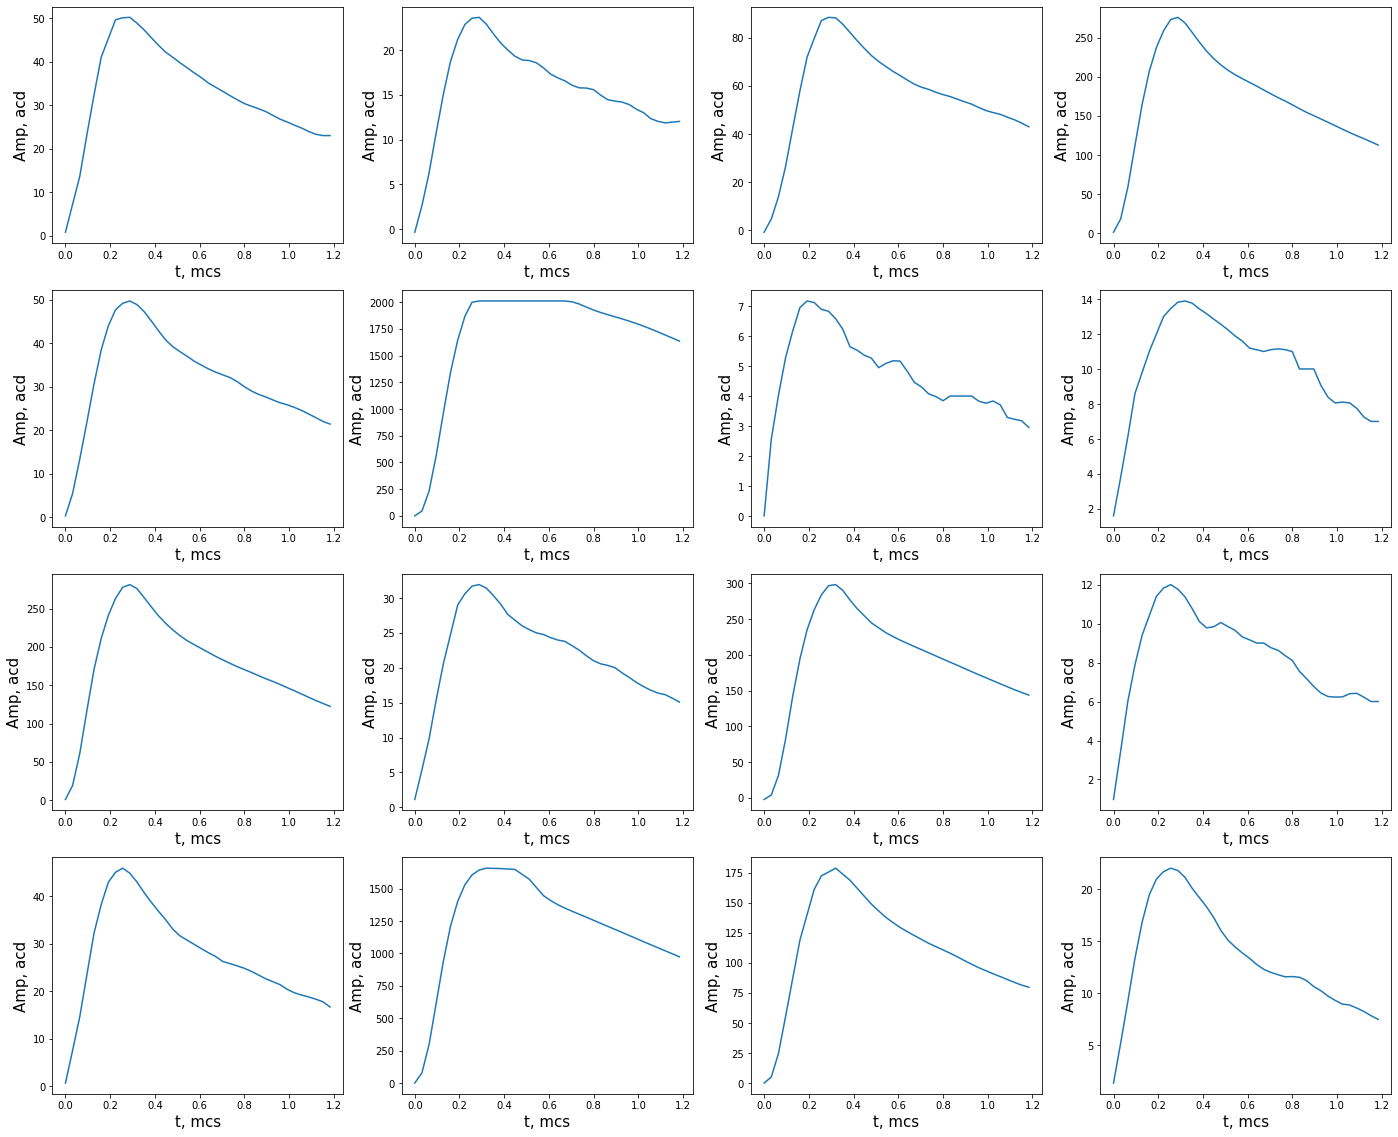

In [185]:
fig, axs = plt.subplots(4, 4, figsize=(24, 20))
axs = axs.ravel()
x = np.arange(38)
#bin_count = 60
for j in range(16):
    #axs[j].plot(x*32e-3, y_sl[611+j])
    axs[j].plot(x*32e-3, X_ts_ch[j][0])
    axs[j].set_xlabel("t, mcs", fontsize = 15)
    axs[j].set_ylabel("Amp, acd", fontsize = 15)

In [186]:
pred_n[0:16]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

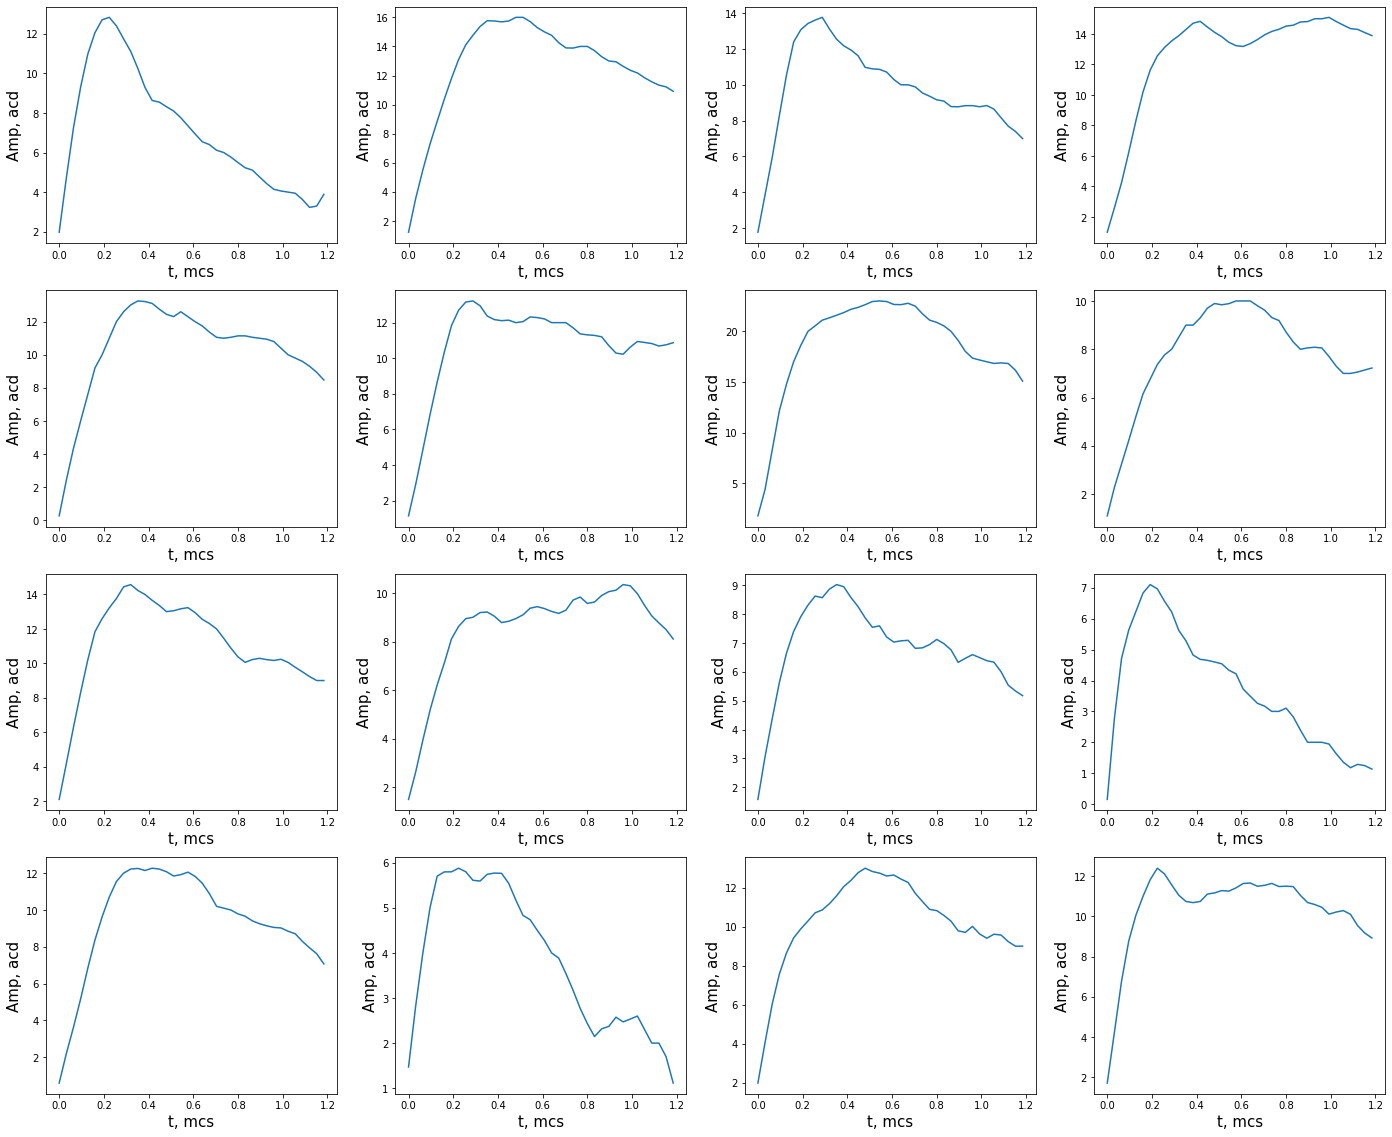

In [187]:
fig, axs = plt.subplots(4, 4, figsize=(24, 20))
axs = axs.ravel()
x = np.arange(38)
#bin_count = 60
for j in range(16):
    #axs[j].plot(x*32e-3, y_sl[611+j])
    axs[j].plot(x*32e-3, X_ts_n[j][0])
    axs[j].set_xlabel("t, mcs", fontsize = 15)
    axs[j].set_ylabel("Amp, acd", fontsize = 15)

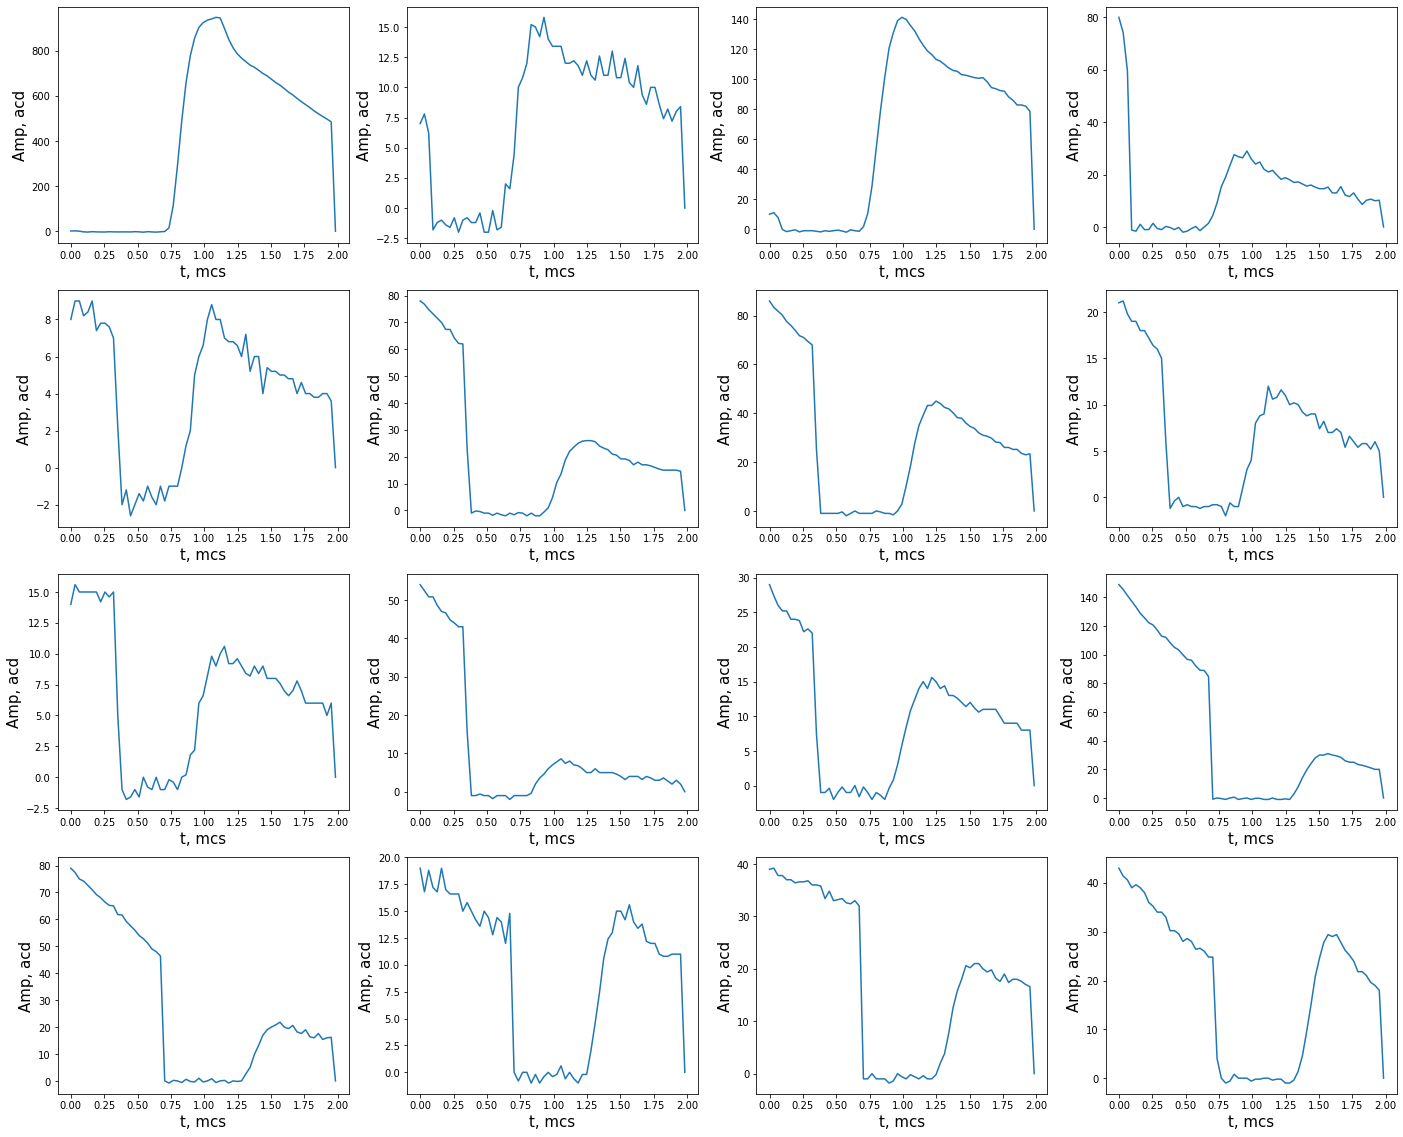

In [607]:
fig, axs = plt.subplots(4, 4, figsize=(24, 20))
axs = axs.ravel()
x = np.arange(63)
#bin_count = 60
for j in range(16):
    #axs[j].plot(x*32e-3, y_sl[611+j])
    axs[j].plot(x*32e-3, y_ot[innd[611+j]])
    axs[j].set_xlabel("t, mcs", fontsize = 15)
    axs[j].set_ylabel("Amp, acd", fontsize = 15)

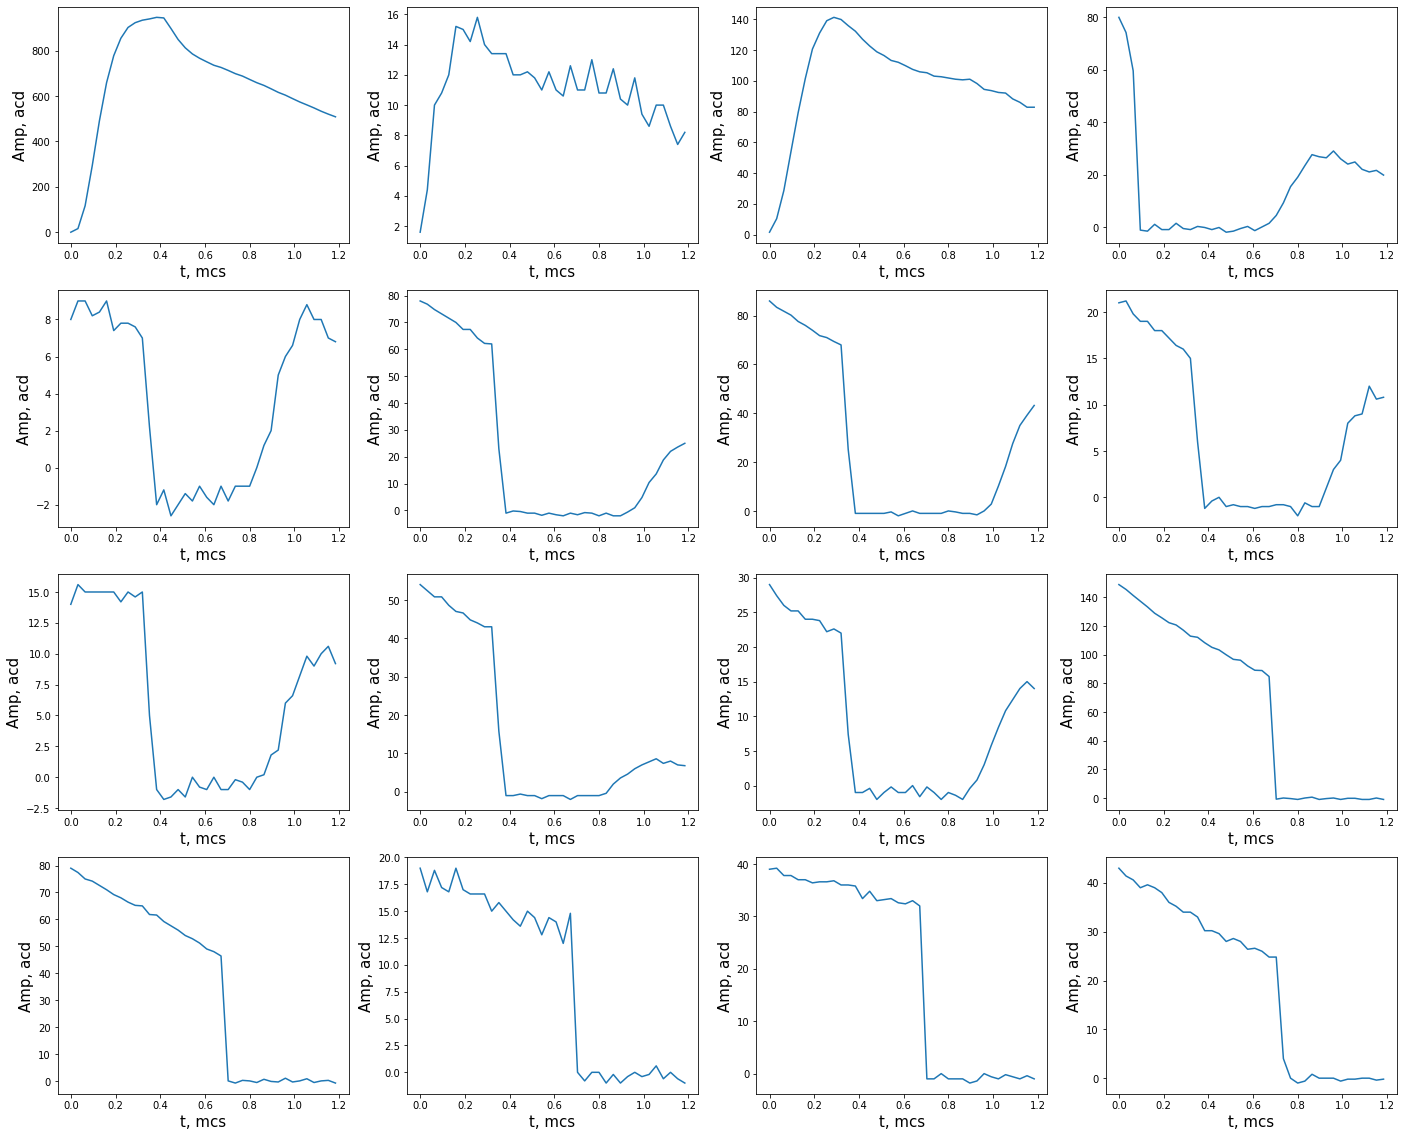

In [584]:
fig, axs = plt.subplots(4, 4, figsize=(24, 20))
axs = axs.ravel()
x = np.arange(38)
#bin_count = 60
for j in range(16):
    axs[j].plot(x*32e-3, y_sl[611+j])
    axs[j].set_xlabel("t, mcs", fontsize = 15)
    axs[j].set_ylabel("Amp, acd", fontsize = 15)

In [188]:
ffr_ch = np.argmax(X_ts_ch,axis=2)
ff_ch = ffr_ch[ffr_ch*32e-3<0.36]
ff_ch.shape, ffr_ch.shape, ff_ch.shape[0]/ffr_ch.shape[0]

(torch.Size([607]), torch.Size([626, 1]), 0.9696485623003195)

In [189]:
ffr_n = np.argmax(X_ts_n, axis=2)
ff_n = ffr_n[ffr_n*32e-3>=0.36]
ff_n.shape, ffr_n.shape, ff_n.shape[0]/ffr_n.shape[0]

(torch.Size([192]), torch.Size([833, 1]), 0.2304921968787515)

In [190]:
y_true = np.ones(X_ts_ch.shape[0])
y_pred = pred_ch
target_names = ['neutron','charged']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     neutron       0.00      0.00      0.00         0
     charged       1.00      0.83      0.91       626

    accuracy                           0.83       626
   macro avg       0.50      0.41      0.45       626
weighted avg       1.00      0.83      0.91       626



In [192]:
y_true = np.zeros(X_ts_n.shape[0])
y_pred = pred_n
target_names = ['neutron','charged']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     neutron       1.00      0.28      0.44       833
     charged       0.00      0.00      0.00         0

    accuracy                           0.28       833
   macro avg       0.50      0.14      0.22       833
weighted avg       1.00      0.28      0.44       833



Text(0, 0.5, '$N$')

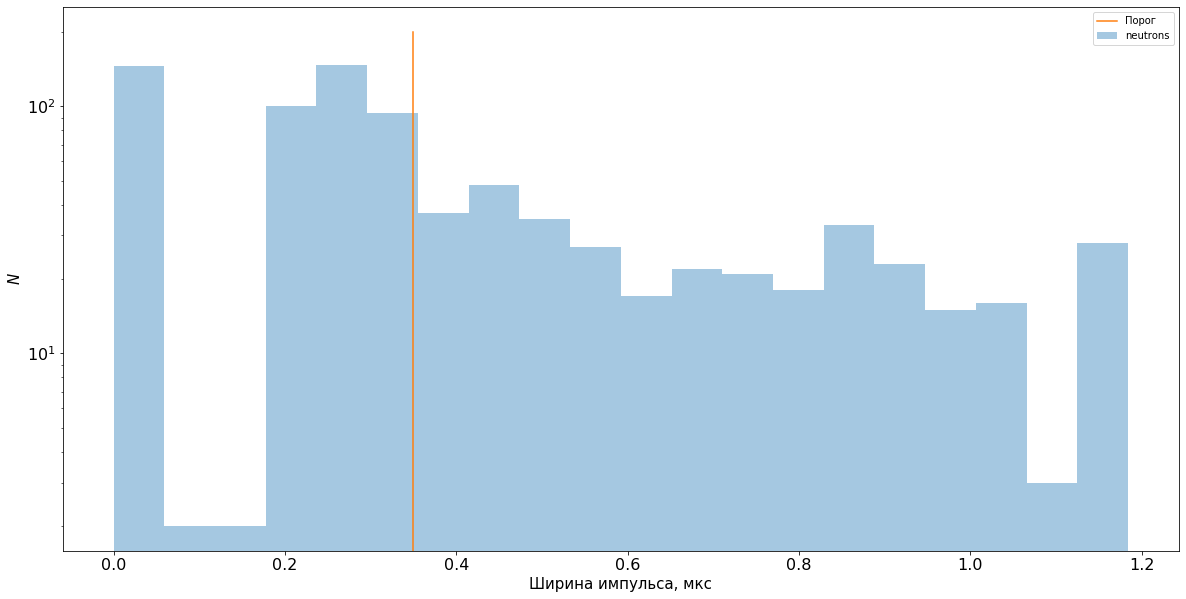

In [157]:
plt.figure(figsize=(20, 10))
#sns.distplot(ffr_ch*32e-3, kde=False, bins=20, label='Charged')
sns.distplot(ffr_n*32e-3, kde=False, bins=20, label='neutrons')
plt.plot(([0.35, 0.35]),([0, 200]), label='Порог')
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlim(0, 1.4)
plt.legend()
plt.xlabel('Ширина импульса, мкс', fontsize = 15)
plt.ylabel("$N$", fontsize = 15)

# Заряженная компонента

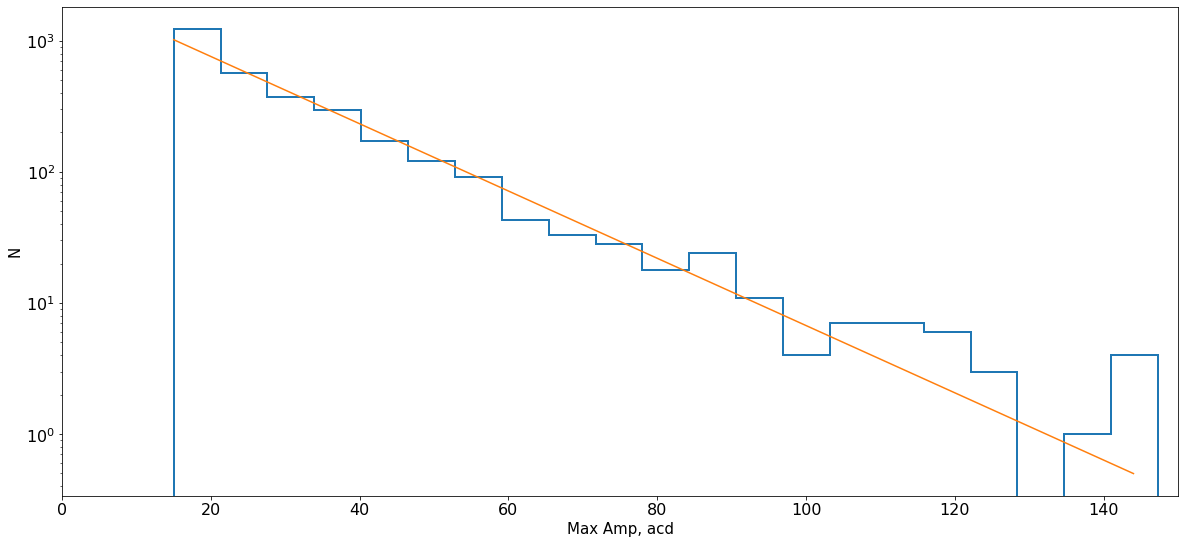

In [14]:
x2 = np.arange(15, 145)
plt.figure(figsize=(20, 9))
plt.hist(max_el, bins= 60, histtype = 'step',linewidth=2)
#[-0.02566248  3.39386332]  [-0.05909004,  7.8146591 ]
#array([ 0.10502711, -0.40116352])
#    y ≈ exp(-0.401) * exp(0.105 * x) = 0.670 * exp(0.105 * x)
plt.plot(x2, np.exp(7.8146591)* np.exp(-0.05909004*x2))  #exp(-A/16.9)
#plt.plot(x2, 10**func(x2, *popt), 'r-')
plt.xlim(0, 150)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Max Amp, acd",fontsize = 15)
plt.ylabel("N",fontsize = 15)
plt.yscale('log')

Text(0, 0.5, '$N$')

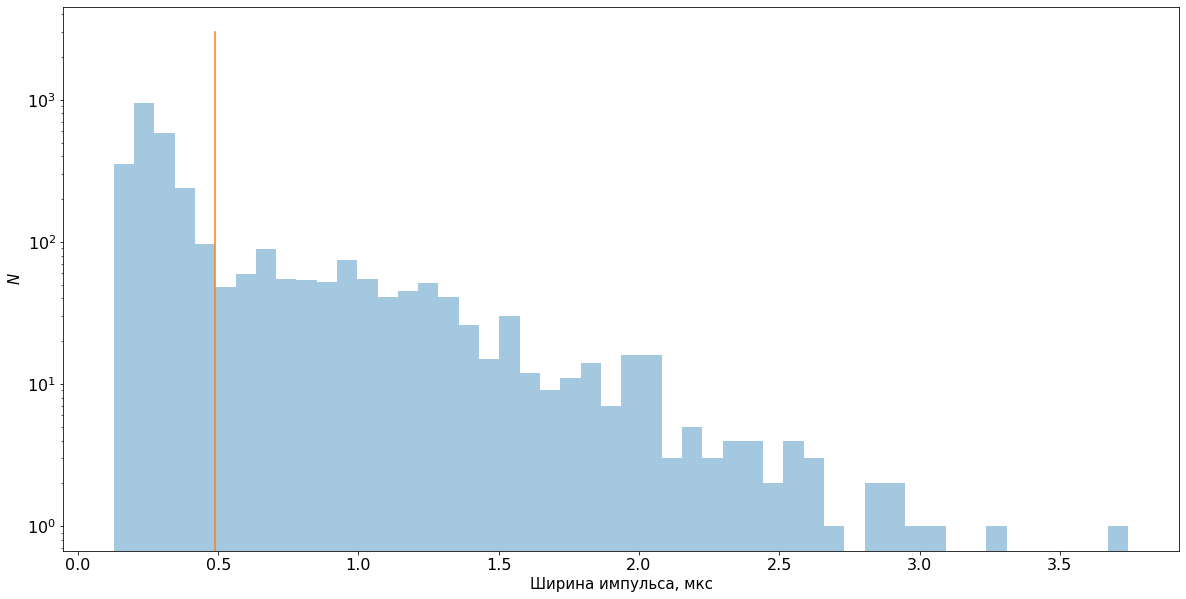

In [11]:
plt.figure(figsize=(20, 10))
sns.distplot(front*32e-3, kde=False, bins=50)
plt.plot(([0.49, 0.49]),([0, 3000]), label='Порог')
plt.yscale('log')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlim(0, 3)
#plt.legend()
plt.xlabel('Ширина импульса, мкс', fontsize = 15)
plt.ylabel("$N$", fontsize = 15)